In [1]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score


C:\Users\sanja\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
df=pd.read_csv(r"C:\Users\sanja\Downloads\advertising.csv")

In [3]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [4]:
print(f'''Number of rows:{df.shape[0]}
Number of cloumns:{df.shape[1]}''')

Number of rows:200
Number of cloumns:4


In [5]:
df.isna().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

Text(0.5, 1.0, 'Correlation among the variables')

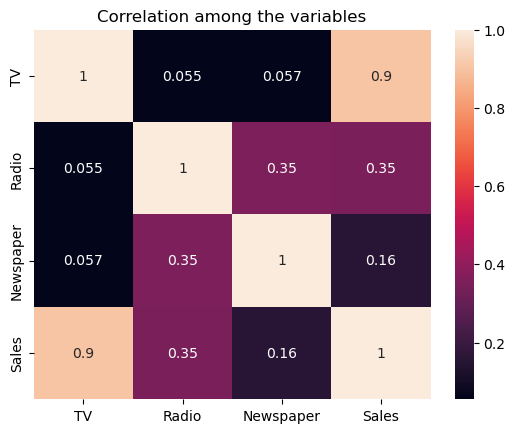

In [6]:
sns.heatmap(df.corr(),annot=True,fmt='.2g')
plt.title("Correlation among the variables")

Text(0, 0.5, 'Values')

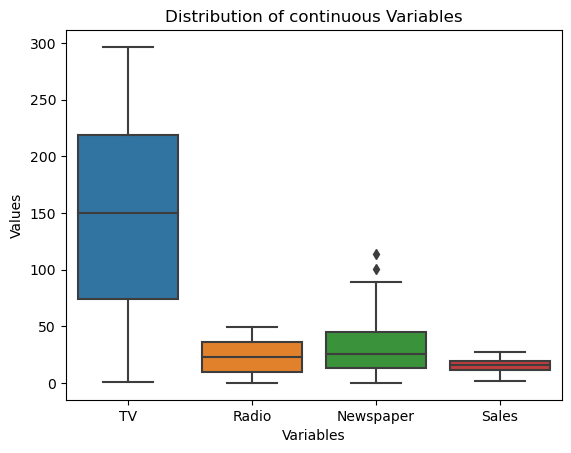

In [7]:
sns.boxplot(df.melt(value_vars=df.columns),x='variable',y='value')
plt.title("Distribution of continuous Variables")
plt.xlabel('Variables')
plt.ylabel('Values')          

In [8]:
X=df.drop(['Sales'],axis=1)
y=df['Sales']

In [9]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=101)
print(f'''X Train:{X_train.shape}
X Test:{X_test.shape}
y Train:{y_train.shape}
y Test:{y_test.shape}''')

X Train:(160, 3)
X Test:(40, 3)
y Train:(160,)
y Test:(40,)


In [10]:
preprocess=Pipeline([
    ('scalar',StandardScaler())
])

model=Pipeline([
    ('preprocess',preprocess),
    ('regressor',RandomForestRegressor())
])

model.fit(X_train,y_train)

Pipeline(steps=[('preprocess', Pipeline(steps=[('scalar', StandardScaler())])),
                ('regressor', RandomForestRegressor())])

In [11]:
y_pred=model.predict(X_test)
print(f'Testint Accuracy:{round(100*r2_score(y_test,y_pred),2)}%')

Testint Accuracy:94.47%


In [12]:
with open('./model.pkl','wb') as fp:
    pickle.dump(model,fp)